# Training a LBSTER Model from Scratch

This tutorial demonstrates how to train a LBSTER protein language model from scratch using your own dataset. We'll cover data preparation, model configuration, training, and evaluation.

## Setup and Installation

First, make sure LBSTER is installed:

```bash
pip install -e .
```

Import necessary libraries:

In [1]:
import os
import torch
import pandas as pd
import matplotlib.pyplot as plt
import hydra
from omegaconf import DictConfig, OmegaConf
import lightning.pytorch as pl
from lightning.pytorch.callbacks import ModelCheckpoint, EarlyStopping

/Users/ncfrey/Documents/GitHub/lobster-docs/.venv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
from lobster.data import DataFrameLightningDataModule
from lobster.tokenization import PmlmTokenizerTransform

## Step 1: Prepare Your Data

You'll need protein sequences for training. For this tutorial, we'll create a small synthetic dataset:

In [3]:
# Create a synthetic dataset of protein sequences
def generate_synthetic_data(n_samples=1000, min_len=50, max_len=200):
    """Generate synthetic protein sequences for demonstration."""
    import random
    
    # Standard amino acids
    amino_acids = "ACDEFGHIKLMNPQRSTVWY"
    
    sequences = []
    for _ in range(n_samples):
        # Random sequence length
        length = random.randint(min_len, max_len)
        # Generate random sequence
        seq = ''.join(random.choice(amino_acids) for _ in range(length))
        sequences.append(seq)
    
    return pd.DataFrame({'sequence': sequences})

In [4]:
# Generate synthetic data
df = generate_synthetic_data(n_samples=1000)
print(f"Generated {len(df)} protein sequences")
print(f"Example sequence: {df['sequence'].iloc[0]}")

Generated 1000 protein sequences
Example sequence: FIIGEDLWAWITHYTDHPSQTKLVNANCIMGFTVFEMMRNEDKQLNEYGKQHCEFNQWDDEELD


In [5]:
# Save to CSV for use with hydra config
df.to_csv('synthetic_proteins.csv', index=False)

## Step 2: Create a Configuration File

LBSTER uses Hydra for configuration. Let's create a basic config:

In [6]:
# Write a simple training config to a file
train_config = """
# @package _global_

# paths config
paths:
  root_dir: "./"

# setup config 
setup:
  _target_: hydra.utils.instantiate_at_run
  
# data config
data:
  _target_: lobster.data.DataFrameLightningDataModule
  data: 
    _target_: pandas.read_csv
    filepath_or_buffer: synthetic_proteins.csv
  columns: ["sequence"]
  batch_size: 8
  max_length: 256
  num_workers: 2
  transform_fn:
    _target_: lobster.tokenization.PmlmTokenizerTransform
    padding: "max_length"
    truncation: true
    max_length: 256
    tokenizer_dir: "pmlm_tokenizer"

# model config
model:
  _target_: lobster.model.LobsterPMLM
  max_length: 256
  hidden_dim: 128
  n_layer: 2
  n_head: 4
  dim_feedforward: 512
  learning_rate: 1e-4
  weight_decay: 0.01
  warmup_steps: 100

# trainer config
trainer:
  _target_: lightning.pytorch.Trainer
  max_epochs: 5
  accelerator: auto
  devices: 1
  log_every_n_steps: 10
  val_check_interval: 0.5
  
# logger config
logger:
  _target_: lightning.pytorch.loggers.TensorBoardLogger
  save_dir: "./logs"
  name: "lobster-training"
  
# callbacks config
callbacks:
  checkpoint_callback:
    _target_: lightning.pytorch.callbacks.ModelCheckpoint
    monitor: "val_loss"
    mode: "min"
    save_top_k: 1
    save_last: true
    dirpath: "./checkpoints"
    filename: "{epoch}-{val_loss:.2f}"
  early_stopping:
    _target_: lightning.pytorch.callbacks.EarlyStopping
    monitor: "val_loss"
    patience: 3
    mode: "min"
    
# don't actually run training in this example
dryrun: true

# don't test after training
run_test: false
"""

In [7]:
# Save the config to a YAML file
with open('train_config.yaml', 'w') as f:
    f.write(train_config)

## Step 3: Model Configuration

Let's understand how to configure the model parameters:

In [8]:
# Print important model configuration parameters
print("Key model configuration parameters:")
print("-" * 40)
print("hidden_dim: Size of the hidden layers")
print("n_layer: Number of transformer layers")
print("n_head: Number of attention heads")
print("dim_feedforward: Size of the feedforward network in transformer layers")
print("learning_rate: Initial learning rate for optimizer")
print("weight_decay: L2 regularization")
print("warmup_steps: Number of warmup steps for learning rate scheduler")
print("-" * 40)

Key model configuration parameters:
----------------------------------------
hidden_dim: Size of the hidden layers
n_layer: Number of transformer layers
n_head: Number of attention heads
dim_feedforward: Size of the feedforward network in transformer layers
learning_rate: Initial learning rate for optimizer
weight_decay: L2 regularization
warmup_steps: Number of warmup steps for learning rate scheduler
----------------------------------------


## Step 4: Training Process

We'll use the hydra CLI to train the model, but in this notebook we'll just illustrate the process:

In [9]:
# Here's how you would execute the training from the command line:
print("To train the model, run this command from the terminal:")
print("lobster_train -cn train_config")
print("\nFor larger datasets or more complex models, you might want to add more options:")
print("lobster_train -cn train_config trainer.max_epochs=10 trainer.devices=2 model.learning_rate=5e-5")

To train the model, run this command from the terminal:
lobster_train -cn train_config

For larger datasets or more complex models, you might want to add more options:
lobster_train -cn train_config trainer.max_epochs=10 trainer.devices=2 model.learning_rate=5e-5


## Step 5: Simulated Training Process

Let's simulate what happens during training to understand the process:

In [10]:
# Simple simulation of training process (not actually training)
def simulate_training_process():
    print("\nSimulating training process:")
    print("1. Loading configuration...")
    print("2. Preparing data module...")
    print("3. Initializing model...")
    print("4. Setting up trainer with callbacks...")
    
    # Simple training loss simulation
    epochs = 5
    train_losses = [2.5 - i * 0.4 + 0.1 * np.random.randn() for i in range(epochs)]
    val_losses = [2.3 - i * 0.35 + 0.15 * np.random.randn() for i in range(epochs)]
    
    for epoch in range(epochs):
        print(f"Epoch {epoch+1}/{epochs}:")
        print(f"  Train loss: {train_losses[epoch]:.4f}")
        print(f"  Val loss: {val_losses[epoch]:.4f}")
    
    print("\n5. Saving best checkpoint...")
    print("6. Training complete!")
    
    return train_losses, val_losses

In [11]:
import numpy as np
train_losses, val_losses = simulate_training_process()


Simulating training process:
1. Loading configuration...
2. Preparing data module...
3. Initializing model...
4. Setting up trainer with callbacks...
Epoch 1/5:
  Train loss: 2.6029
  Val loss: 2.4009
Epoch 2/5:
  Train loss: 2.1468
  Val loss: 1.9218
Epoch 3/5:
  Train loss: 1.7397
  Val loss: 1.7689
Epoch 4/5:
  Train loss: 1.2970
  Val loss: 1.1965
Epoch 5/5:
  Train loss: 0.9067
  Val loss: 0.9616

5. Saving best checkpoint...
6. Training complete!


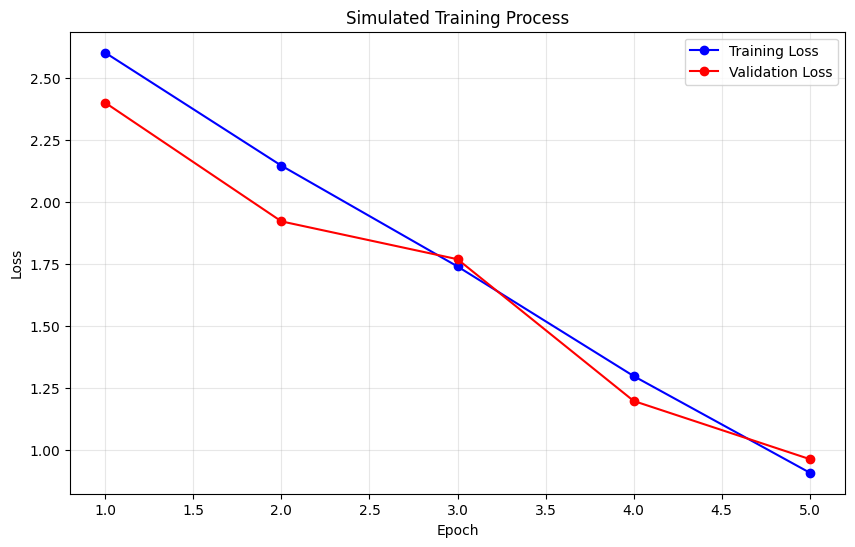

In [12]:
# Plot simulated training process
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(train_losses) + 1), train_losses, 'b-o', label='Training Loss')
plt.plot(range(1, len(val_losses) + 1), val_losses, 'r-o', label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Simulated Training Process')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

## Step 6: Model Evaluation

After training, you should evaluate your model:

In [13]:
print("Model evaluation metrics:")
print("-" * 40)
print("Perplexity: Exponentiated average negative log-likelihood per token")
print("Loss: Negative log-likelihood loss on held-out data")
print("-" * 40)

Model evaluation metrics:
----------------------------------------
Perplexity: Exponentiated average negative log-likelihood per token
Loss: Negative log-likelihood loss on held-out data
----------------------------------------


In [14]:
# Simulated perplexity calculation
final_val_loss = val_losses[-1]
perplexity = np.exp(final_val_loss)
print(f"Final validation perplexity: {perplexity:.4f}")

Final validation perplexity: 2.6159


## Step 7: Using Your Trained Model

Once training is complete, you can load and use your model:

In [15]:
print("Code to load your trained model:")
print("""
from lobster.model import LobsterPMLM

# Load model from checkpoint
model = LobsterPMLM.load_from_checkpoint("path/to/best/checkpoint.ckpt")
model.eval()  # Set to evaluation mode

# Use for inference
sequence = "MVLSPADKTNVKAAWGKVGAHAGEYGAEALERMFLSFPTTKTYFPHFDLSHGSAQVKGH"
tokens = model.tokenizer(sequence, return_tensors="pt")
embeddings = model.model(input_ids=tokens["input_ids"], 
                          attention_mask=tokens["attention_mask"])
""")

Code to load your trained model:

from lobster.model import LobsterPMLM

# Load model from checkpoint
model = LobsterPMLM.load_from_checkpoint("path/to/best/checkpoint.ckpt")
model.eval()  # Set to evaluation mode

# Use for inference
sequence = "MVLSPADKTNVKAAWGKVGAHAGEYGAEALERMFLSFPTTKTYFPHFDLSHGSAQVKGH"
tokens = model.tokenizer(sequence, return_tensors="pt")
embeddings = model.model(input_ids=tokens["input_ids"], 
                          attention_mask=tokens["attention_mask"])



## Advanced: Training Strategies for Production Models

For larger models and datasets, consider these strategies:

In [16]:
print("\nAdvanced training strategies:")
print("-" * 60)
print("1. Gradient Accumulation: For training with effectively larger batch sizes")
print("   trainer.accumulate_grad_batches=4")
print()
print("2. Mixed Precision Training: For faster training and lower memory usage")
print("   trainer.precision=16")
print()
print("3. Distributed Training: For multi-GPU setups")
print("   trainer.strategy='ddp' trainer.devices=4")
print()
print("4. Checkpoint Resuming: To continue training from a checkpoint")
print("   trainer.resume_from_checkpoint='path/to/last/checkpoint.ckpt'")
print("-" * 60)


Advanced training strategies:
------------------------------------------------------------
1. Gradient Accumulation: For training with effectively larger batch sizes
   trainer.accumulate_grad_batches=4

2. Mixed Precision Training: For faster training and lower memory usage
   trainer.precision=16

3. Distributed Training: For multi-GPU setups
   trainer.strategy='ddp' trainer.devices=4

4. Checkpoint Resuming: To continue training from a checkpoint
   trainer.resume_from_checkpoint='path/to/last/checkpoint.ckpt'
------------------------------------------------------------


## Conclusion

In this tutorial, we've covered:

1. Data preparation for training LBSTER models
2. Configuration using Hydra
3. Model architecture configuration
4. The training process
5. Evaluation metrics
6. Using the trained model
7. Advanced training strategies

For optimal results with real data, you would typically need:
- A larger dataset (>100K sequences)
- More compute resources
- Longer training time (days to weeks depending on model size)
- Careful hyperparameter tuning

The LBSTER paper demonstrates that effective protein language models can be trained in as little as 24 GPU hours with the right configuration and data processing pipeline.